In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.775
[1,  4000] loss: 0.814
[1,  6000] loss: 0.811
[1,  8000] loss: 0.819
[1, 10000] loss: 0.854
[1, 12000] loss: 0.867
[2,  2000] loss: 0.737
[2,  4000] loss: 0.763
[2,  6000] loss: 0.815
[2,  8000] loss: 0.812
[2, 10000] loss: 0.824
[2, 12000] loss: 0.815
[3,  2000] loss: 0.728
[3,  4000] loss: 0.764
[3,  6000] loss: 0.775
[3,  8000] loss: 0.768
[3, 10000] loss: 0.802
[3, 12000] loss: 0.794
[4,  2000] loss: 0.700
[4,  4000] loss: 0.714
[4,  6000] loss: 0.743
[4,  8000] loss: 0.770
[4, 10000] loss: 0.792
[4, 12000] loss: 0.782
[5,  2000] loss: 0.667
[5,  4000] loss: 0.718
[5,  6000] loss: 0.751
[5,  8000] loss: 0.754
[5, 10000] loss: 0.749
[5, 12000] loss: 0.760
[6,  2000] loss: 0.659
[6,  4000] loss: 0.700
[6,  6000] loss: 0.706
[6,  8000] loss: 0.719
[6, 10000] loss: 0.742
[6, 12000] loss: 0.772
[7,  2000] loss: 0.655
[7,  4000] loss: 0.677
[7,  6000] loss: 0.686
[7,  8000] loss: 0.733
[7, 10000] loss: 0.716
[7, 12000] loss: 0.748
[8,  2000] loss: 0.636
[8,  4000] 

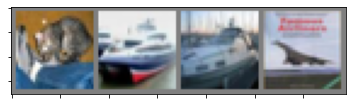

GroundTruth:    cat  ship  ship plane


Traceback (most recent call last):
  File "/Users/christiansvinth/opt/anaconda3/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/Users/christiansvinth/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/Users/christiansvinth/opt/anaconda3/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


In [15]:
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


In [17]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %
